In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
cb = CatBoostRegressor(random_state=1, verbose=False)

In [6]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [7]:
cat = evaluate_model(cb, X, y)

In [8]:
cat

,fit_time,score_time,test_score
0,6.864871,0.004770,0.920566
1,6.138002,0.026240,0.899820
2,5.886092,0.028851,0.938045
3,7.064473,0.009956,0.933383
4,6.272960,0.016633,0.949361
5,6.117750,0.006626,0.934502
6,6.132799,0.008442,0.944618
7,5.983638,0.010000,0.924652
8,5.296091,0.006789,0.947610
9,5.236888,0.004111,0.883656


In [9]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [10]:
cat

,cat_score
0,0.920566
1,0.899820
2,0.938045
3,0.933383
4,0.949361
5,0.934502
6,0.944618
7,0.924652
8,0.947610
9,0.883656


In [11]:
ordinald1 = pd.read_csv('OrdinalDropIF309.csv')
ordinald1.shape

(2579, 83)

In [12]:
ordinald1 = ordinald1.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinald1.shape

(2579, 80)

In [13]:
Xd1 = ordinald1.drop(['SalePrice'], axis=1)
yd1 = ordinald1.SalePrice

In [14]:
catd1 = evaluate_model(cb, Xd1, yd1)

In [15]:
catd1

,fit_time,score_time,test_score
0,6.423214,0.009168,0.931308
1,6.391766,0.008762,0.946897
2,6.319387,0.015928,0.946280
3,6.109802,0.009047,0.911824
4,6.293275,0.005477,0.949900
5,6.421587,0.006307,0.933133
6,5.982157,0.010845,0.929582
7,7.092133,0.012307,0.926053
8,5.659494,0.012110,0.950737
9,5.738885,0.004556,0.939564


In [16]:
catd1 = catd1[['test_score']].rename(columns={'test_score':'catd1_score'})

In [17]:
catd1

,catd1_score
0,0.931308
1,0.946897
2,0.946280
3,0.911824
4,0.949900
5,0.933133
6,0.929582
7,0.926053
8,0.950737
9,0.939564


In [18]:
ordinalIF3 = pd.read_csv('OrdinalDropIF50_309_2004.csv')
ordinalIF3.shape

(2577, 83)

In [19]:
ordinalIF3 = ordinalIF3.drop(['Unnamed: 0'], axis=1)
ordinalIF3.shape

(2577, 82)

In [20]:
XIF3 = ordinalIF3.drop(['SalePrice'], axis=1)
yIF3 = ordinalIF3.SalePrice

In [21]:
catIF3 = evaluate_model(cb, XIF3, yIF3)

In [22]:
catIF3

,fit_time,score_time,test_score
0,7.930125,0.009063,0.937647
1,6.829793,0.034229,0.935201
2,8.565772,0.010770,0.929239
3,6.917010,0.009076,0.936201
4,6.914103,0.010370,0.951823
5,6.701612,0.012039,0.916783
6,6.906547,0.008160,0.932464
7,7.593750,0.010040,0.938504
8,5.965110,0.008846,0.945622
9,5.972338,0.003908,0.954835


In [23]:
catIF3 = catIF3[['test_score']].rename(columns={'test_score':'catIF1_score'})

In [24]:
catIF3

,catIF1_score
0,0.937647
1,0.935201
2,0.929239
3,0.936201
4,0.951823
5,0.916783
6,0.932464
7,0.938504
8,0.945622
9,0.954835


In [25]:
combo = pd.concat([cat, catd1, catIF3], axis=1)

In [26]:
combo

,cat_score,catd1_score,catIF1_score
0,0.920566,0.931308,0.937647
1,0.899820,0.946897,0.935201
2,0.938045,0.946280,0.929239
3,0.933383,0.911824,0.936201
4,0.949361,0.949900,0.951823
5,0.934502,0.933133,0.916783
6,0.944618,0.929582,0.932464
7,0.924652,0.926053,0.938504
8,0.947610,0.950737,0.945622
9,0.883656,0.939564,0.954835


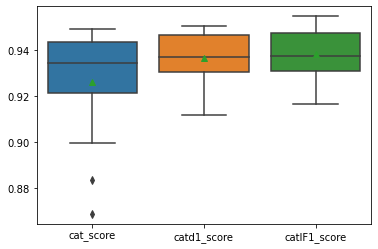

In [27]:
sns.boxplot(data=combo, showmeans=True);

In [28]:
combo.describe()

,cat_score,catd1_score,catIF1_score
count,15.000000,15.000000,15.000000
mean,0.926385,0.936878,0.938376
std,0.024378,0.011131,0.010703
min,0.868666,0.911824,0.916783
25%,0.921228,0.930445,0.931095
50%,0.934502,0.936986,0.937647
75%,0.943737,0.946589,0.947565
max,0.949361,0.950737,0.954835
